In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib 


Using matplotlib backend: TkAgg


In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [43]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height: 70% !important;}</style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv("../datasets/titanic/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
male = X['Sex'] == 'male'
female = X['Sex'] != 'male'
X.loc[male, 'Age'] = X.loc[male, 'Age'].fillna(X.loc[male, 'Age'].median())
X.loc[female, 'Age'] = X.loc[female, 'Age'].fillna(X.loc[female, 'Age'].median())

In [7]:
y = titanic_data.Survived

In [8]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
clf.score(X_train, y_train)

0.8238255033557047

In [14]:
clf.score(X_test, y_test)

0.8203389830508474

In [15]:
max_depth_values = range(1, 100)

In [16]:
scores_data = pd.DataFrame()

In [17]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [18]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.785261
0,5,0.842282,0.806780,0.796928


In [19]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name ='set_type', value_name='score')

In [20]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.785261
202,5,cross_val_score,0.796928
203,6,cross_val_score,0.795374
204,7,cross_val_score,0.802040
205,8,cross_val_score,0.791843
206,9,cross_val_score,0.803692
207,10,cross_val_score,0.786814


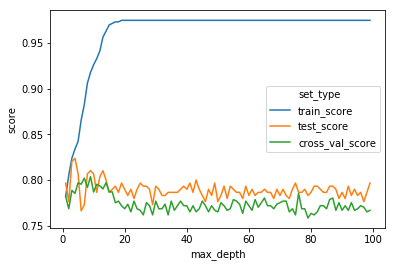

In [21]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [23]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915253

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 100)}

In [27]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)},
             pre_dispat

In [28]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [29]:
best_clf = grid_search_cv_clf.best_estimator_

In [30]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [31]:
y_pred = best_clf.predict(X_test)

In [32]:
from sklearn.metrics import precision_score, recall_score

In [33]:
precision_score(y_test, y_pred)

0.7889908256880734

In [34]:
recall_score(y_test, y_pred)

0.7166666666666667

In [35]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.49056604, 0.50943396],
       [1.        , 0.        ],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [0.49056604, 0.50943396],
       [0.        , 1.        ],
       [0.44      , 0.56      ],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.49056604, 0.50943396],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.67647059, 0.32352941],
       [0.875     , 0.125     ],
       [0.875     , 0.125     ],
       [0.49056604, 0.50943396],
       [0.

In [36]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [37]:
precision_score(y_test, y_pred)

0.90625

In [38]:
recall_score(y_test, y_pred)

0.48333333333333334

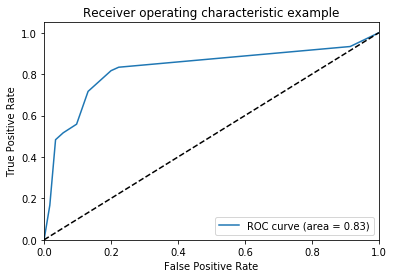

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [47]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [48]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

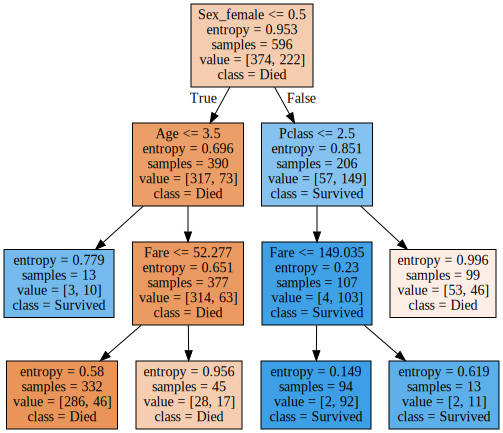

In [49]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X), class_names=['Died', 'Survived'],
                                   filled = True))

display(SVG(graph.pipe(format="svg")))